In [ ]:
import cv2
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch.utils.data as data

import scipy.stats as ss

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
from tqdm.notebook import trange, tqdm

from PIL import Image, ImageDraw, ImageFont
import PIL

import os

import copy
import random
import time

%matplotlib inline

In [ ]:
# !pip install transformers
# !pip install sentencepiece
# !pip install transformers[sentencepiece]
# !pip install --upgrade pip

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
import sentencepiece

In [ ]:
from google.colab import drive
drive.mount('./data')

Drive already mounted at ./data; to attempt to forcibly remount, call drive.mount("./data", force_remount=True).


In [ ]:
!cp /content/data/MyDrive/ColabNotebooks/Doc_recognition/Passports/pre_train.py /content
!cp /content/data/MyDrive/ColabNotebooks/Doc_recognition/Passports/models.py /content

In [ ]:
PREFIX = "data/MyDrive/ColabNotebooks/Doc_recognition/Passports/"
PASSPORTS_PATH = PREFIX + "dataset/images/"

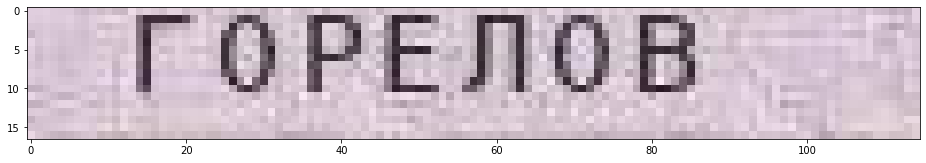

In [ ]:
# load image from the IAM database (actually this model is meant to be used on printed text)
image = PIL.Image.open(PREFIX + "dataset/images/passport111.jpg").crop((295, 408, 410, 425))
plt.figure(figsize=(16, 10))
plt.imshow(image)

In [ ]:
#  !pip install --no-cache-dir transformers sentencepiece

In [ ]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model

In [ ]:
df = pd.read_csv(PREFIX + "dataset/Crops.csv")
df.head()

,Unnamed: 0,file_name,text
0,0,crop-0-department1.jpg,СУХОЛОЖСКИМ ОВД СВЕРДЛОВСКОЙ ОБЛ.
1,1,crop-0-passport_date.jpg,17.02.2022
2,2,crop-0-code.jpg,662-051
3,3,crop-0-surname1.jpg,НОВИКОВ
4,4,crop-0-name.jpg,АНАТОЛИЙ


In [ ]:
crops = np.array(df.loc[:, ["file_name", "text"]])

In [84]:
n = np.random.randint(1000)
file_name, text = crops[n, :]
image = PIL.Image.open(PREFIX + f"dataset/crops/{file_name}")

ДАНИЛОВИЧ


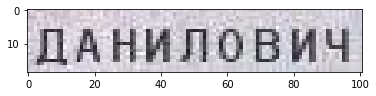

In [85]:
print(text)
plt.imshow(image)

In [86]:
pixel_values = processor(images=image, return_tensors="pt").pixel_values

In [87]:
generated_ids = model.generate(pixel_values, max_new_tokens=100)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [88]:
generated_ids, generated_text

(tensor([[    2,  3134, 35441,   863,  7912, 25518,     2]]), 'DAHMJOBMY')

In [51]:
# transform = transforms.Compose([transforms.PILToTensor()])
# img = transform(image.resize((384, 384)))[None, :, :, :]

In [60]:
pixel_values.shape

torch.Size([1, 3, 384, 384])

In [67]:
model.generate("oh", pixel_values)

AttributeError: ignored